# Compose example in catlab

See https://github.com/AlgebraicJulia/Structured-Epidemic-Modeling/blob/main/composition.ipynb

In [14]:
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz
using Catlab.Graphics.Graphviz: Html
using Plots
using JSON
using LabelledArrays
using PrettyTables
using Catlab.WiringDiagrams, Catlab.Graphics

using GraphViz

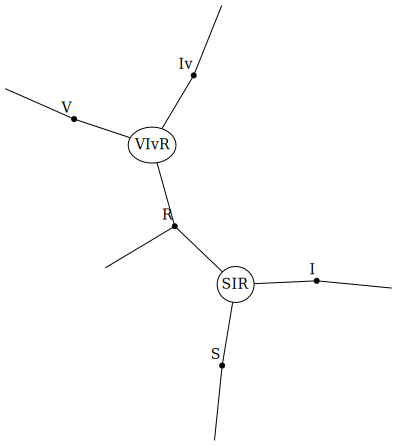

In [15]:
SVIIvR_composition_pattern = @relation (S, V, I, Iv, R) where (S, V, I, Iv, R) begin
  SIR(S, I, R)
  VIvR(V, Iv, R)
end

to_graphviz(SVIIvR_composition_pattern,
    box_labels = :name, junction_labels = :variable, edge_attrs=Dict(:len => "1"))

## Create the sub models

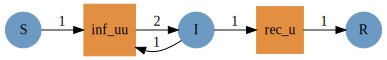

In [16]:
SIR = Open(LabelledPetriNet([:S, :I, :R],
  :inf_uu => ((:S, :I) => (:I, :I)),
  :rec_u => (:I => :R)
))

Graph(SIR)

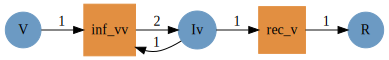

In [17]:
VIvR = Open(LabelledPetriNet([:V, :Iv, :R],
  :inf_vv => ((:V, :Iv) => (:Iv, :Iv)),
  :rec_v => (:Iv => :R)
))

Graph(VIvR)

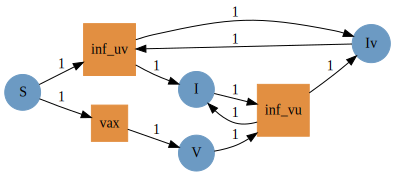

In [18]:
cross_exposure = Open(LabelledPetriNet([:S, :I, :V, :Iv],
  :inf_uv => ((:S, :Iv) => (:I, :Iv)),
  :inf_vu => ((:V, :I) => (:Iv, :I)),
  :vax => (:S => :V)
))

Graph(cross_exposure)

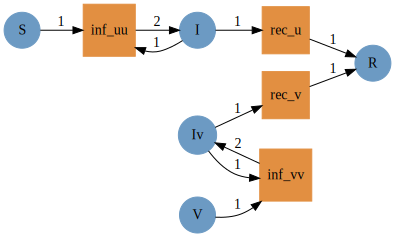

In [19]:
SVIIvR = oapply(SVIIvR_composition_pattern, Dict(
  :SIR => SIR,
  :VIvR => VIvR
)) |> apex

Graph(SVIIvR)

### Test

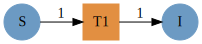

In [20]:
SI = Open(LabelledPetriNet([:S, :I],
  :T1 => ((:S) => (:I))
))
Graph(SI)

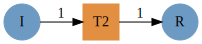

In [21]:
IR = Open(LabelledPetriNet([:I, :R],
  :T2 => ((:I) => (:R))
))
Graph(IR)

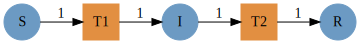

In [22]:
patternMacro = @relation (S, I, R) where (S, I, R) begin
  SI(S, I)
  IR(I, R)
end

SIR = oapply(patternMacro, Dict(
  :SI => SI,
  :IR => IR
)) |> apex

Graph(SIR)

In [23]:
typeof(patternMacro)

Catlab.Programs.RelationalPrograms.UntypedUnnamedRelationDiagram{Symbol, Symbol}

### Manual 
Work around @relation macro so we can create a UWD diagram manually, then use ti to compose two PetriNets together

In [24]:
d = RelationDiagram(0, port_names=nothing)
add_parts!(d, :Box, 1, name=Symbol("SI"))
add_parts!(d, :Box, 1, name=Symbol("IR"))
add_parts!(d, :Junction, 1, variable=Symbol("S"))
add_parts!(d, :Junction, 1, variable=Symbol("I"))
add_parts!(d, :Junction, 1, variable=Symbol("R"))
add_parts!(d, :Port, 1, box=1, junction=1)
add_parts!(d, :Port, 1, box=1, junction=2)
add_parts!(d, :Port, 1, box=2, junction=2)
add_parts!(d, :Port, 1, box=1, junction=3)
add_parts!(d, :OuterPort, 1, outer_junction=1)
add_parts!(d, :OuterPort, 1, outer_junction=2)
add_parts!(d, :OuterPort, 1, outer_junction=3)

3:3

In [27]:
patternMacro = @relation (S, I, R) where (S, I, R) begin
  SI(S, I)
  IR(I, R)
end

Catlab.Programs.RelationalPrograms.UntypedUnnamedRelationDiagram{Symbol, Symbol} with elements Box = 1:2, Port = 1:4, OuterPort = 1:3, Junction = 1:3
┌─────┬──────┐
│ Box │ name │
├─────┼──────┤
│   1 │   SI │
│   2 │   IR │
└─────┴──────┘
┌──────┬─────┬──────────┐
│ Port │ box │ junction │
├──────┼─────┼──────────┤
│    1 │   1 │        1 │
│    2 │   1 │        2 │
│    3 │   2 │        2 │
│    4 │   2 │        3 │
└──────┴─────┴──────────┘
┌───────────┬────────────────┐
│ OuterPort │ outer_junction │
├───────────┼────────────────┤
│         1 │              1 │
│         2 │              2 │
│         3 │              3 │
└───────────┴────────────────┘
┌──────────┬──────────┐
│ Junction │ variable │
├──────────┼──────────┤
│        1 │        S │
│        2 │        I │
│        3 │        R │
└──────────┴──────────┘

In [31]:
d = RelationDiagram(0, port_names=nothing)
add_parts!(d, :Box, 1, name=Symbol("SI"))
add_parts!(d, :Box, 1, name=Symbol("IR"))
add_parts!(d, :Junction, 1, variable=Symbol("S"))
add_parts!(d, :Junction, 1, variable=Symbol("I"))
add_parts!(d, :Junction, 1, variable=Symbol("R"))
add_parts!(d, :Port, 1, box=1, junction=1) 
add_parts!(d, :Port, 1, box=1, junction=2) 
add_parts!(d, :Port, 1, box=2, junction=2) 
add_parts!(d, :Port, 1, box=2, junction=3) 
add_parts!(d, :OuterPort, 1, outer_junction=1)
add_parts!(d, :OuterPort, 1, outer_junction=2)
add_parts!(d, :OuterPort, 1, outer_junction=3)

3:3

In [32]:
SIR2 = oapply(d, Dict(
  :SI => SI,
  :IR => IR
)) |> apex

LabelledPetriNet with elements T = 1:2, S = 1:3, I = 1:2, O = 1:2
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │    T1 │
│ 2 │    T2 │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  2 │  2 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  2 │  3 │
└───┴────┴────┘

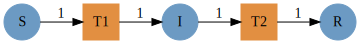

In [33]:
Graph(SIR2)